In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bank Failures Data

- data sourced from [FDIC](https://banks.data.fdic.gov/api/failures)

## Load bank_failures.csv into a dataframe

In [2]:
# raw_df = pd.read_csv('../data/bank_failures.csv') # local
raw_df = pd.read_csv('bank_failures.csv')
raw_df.shape

(4107, 105)

In [3]:
raw_df.head()

,RESDATE,RESCOL,BIDCITY,MONTH,PSTALP,BSTATUS,FAILMON,PO_COST,COST21,COST22,...,COST,UNINSDEP,RESASSET,CHCLASS,FUND,RESADJ,FIN,QBRDEP,CROSS,ID
0,45047.0,0.0,COLUMBUS,NaN,CA,NaN,5.0,16239227.0,NaN,NaN,...,NaN,NaN,0.000000e+00,NM,5,0.0,10543,176436706.0,NaN,4107
1,45005.0,0.0,HICKSVILLE,NaN,NY,A,3.0,NaN,NaN,NaN,...,2400000.0,NaN,1.093259e+08,NM,5,-74036752.0,10540,88612911.0,NaN,4106
2,45011.0,0.0,RALEIGH,NaN,CA,A,3.0,NaN,NaN,NaN,...,16100000.0,NaN,1.658469e+08,SM,5,-123307028.0,10539,175378000.0,NaN,4105
3,44127.0,3.0,ANDOVER,NaN,KS,A,10.0,24787.0,16806.0,16330.0,...,16330.0,NaN,6.871857e+04,NM,5,0.0,10538,64941.0,NaN,4104
4,44120.0,8.0,EVANSVILLE,NaN,FL,I,10.0,28165.0,7247.0,7247.0,...,7247.0,NaN,1.358882e+05,NM,5,526.0,10537,133936.0,NaN,4103


## Data Exploration

In [4]:
columns = raw_df.columns.to_list()

# Show summary statistics for each column
summary_data = {}

for col in columns:
    if raw_df[col].dtype == 'object':
        summary_data[col] = raw_df[col].unique()
    else:
        summary_data[col] = raw_df[col].describe()

# summary_data

## Data PreProcessing


### Select columns

In [5]:
col_name_mapping = {
    'CERT': 'fed_cert_num',
    'FIN': 'financial_institution_num',
    'NAME': 'name',
    'PSTALP': 'state',
    'CITYST': 'city_state',
    'FAILDATE': 'failure_date',
    'SAVR': 'insurance_fund',
    'RESTYPE1': 'transaction_type',
    'CHCLASS1': 'charter_class',
    'RESTYPE': 'resolution_status',
    'QBFDEP': 'total_deposits',
    'QBFASSET': 'total_assets',
    'COST': 'estimated_loss',
}

# select columns from col_name_map
df = raw_df[list(col_name_mapping.keys())]


### Rename columns

In [6]:
# rename columns from col_name_map
df = df.rename(columns=col_name_mapping)

### Map Data Types

In [7]:
type_mapping = {
    'fed_cert_num': 'float64',
    'financial_institution_num': 'int64',
    'name': 'string',
    'state': 'category',
    'city_state': 'category',
    'failure_date': 'datetime64[ns]',
    'insurance_fund': 'category',
    'transaction_type': 'category',
    'charter_class': 'category',
    'resolution_status': 'category',
    'total_deposits': 'float64',
    'total_assets': 'float64',
    'estimated_loss': 'float64',
}

# set data types from type_mapping
df = df.astype(type_mapping)

### Derived failure_quarter


In [8]:
# create fail quarter column from fail date
df['failure_quarter'] = df['failure_date'].dt.quarter

# set failure_quarter to int8
df['failure_quarter'] = df['failure_quarter'].astype('int8')
df.head()
df.dtypes


fed_cert_num                        float64
financial_institution_num             int64
name                                 string
state                              category
city_state                         category
failure_date                 datetime64[ns]
insurance_fund                     category
transaction_type                   category
charter_class                      category
resolution_status                  category
total_deposits                      float64
total_assets                        float64
estimated_loss                      float64
failure_quarter                        int8
dtype: object

### Split fail_date into fail_year, fail_month, fail_day

In [9]:
# split failure_date into failure_year, failure_month, failure_day
df['failure_year'] = df['failure_date'].dt.year
df['failure_month'] = df['failure_date'].dt.month
df['failure_day'] = df['failure_date'].dt.day

# set failure_year to int16
df['failure_year'] = df['failure_year'].astype('int16')

# set failure_month to int8
df['failure_month'] = df['failure_month'].astype('int8')

# set failure_day to int8
df['failure_day'] = df['failure_day'].astype('int8')

df.dtypes

fed_cert_num                        float64
financial_institution_num             int64
name                                 string
state                              category
city_state                         category
failure_date                 datetime64[ns]
insurance_fund                     category
transaction_type                   category
charter_class                      category
resolution_status                  category
total_deposits                      float64
total_assets                        float64
estimated_loss                      float64
failure_quarter                        int8
failure_year                          int16
failure_month                          int8
failure_day                            int8
dtype: object

### Handle missing values

In [10]:
df.isnull().sum()

fed_cert_num                 488
financial_institution_num      0
name                           0
state                          0
city_state                     0
failure_date                   0
insurance_fund                 0
transaction_type               0
charter_class                  0
resolution_status              0
total_deposits                 2
total_assets                 154
estimated_loss               639
failure_quarter                0
failure_year                   0
failure_month                  0
failure_day                    0
dtype: int64

In [11]:
# calculate percentage of null values in each column
df.isnull().sum() / df.shape[0] * 100

fed_cert_num                 11.882152
financial_institution_num     0.000000
name                          0.000000
state                         0.000000
city_state                    0.000000
failure_date                  0.000000
insurance_fund                0.000000
transaction_type              0.000000
charter_class                 0.000000
resolution_status             0.000000
total_deposits                0.048697
total_assets                  3.749696
estimated_loss               15.558802
failure_quarter               0.000000
failure_year                  0.000000
failure_month                 0.000000
failure_day                   0.000000
dtype: float64

#### fed_cert_num



**Strategy:** Set sentinel value of -1

**Reason:** All entries before 1976-11-19 are missing the fed_cert_num.  This is the date the FDIC started using the FDIC Certificate Number as the primary identifier for banks.

In [12]:
# output fed_cert_num with null values sort by failure_date
df[df['fed_cert_num'].isnull()].sort_values(by='failure_date', ascending=False).head()

,fed_cert_num,financial_institution_num,name,state,city_state,failure_date,insurance_fund,transaction_type,charter_class,resolution_status,total_deposits,total_assets,estimated_loss,failure_quarter,failure_year,failure_month,failure_day
3569,NaN,11919,FIRST STATE BANK & TRUST CO.,TX,"RIO GRANDE CITY, TX",1976-11-19,BIF,P&A,NM,FAILURE,12082.0,13754.0,NaN,4,1976,11,19
3580,NaN,11653,FARMERS BANK OF THE STATE OF DELAWARE,DE,"WILMINGTON, DE",1976-03-15,BIF,A/A,NM,ASSISTANCE,370000.0,NaN,NaN,1,1976,3,15
3609,NaN,12894,BANK OF THE COMMONWEALTH,MI,"DETROIT, MI",1972-01-18,BIF,A/A,SM,ASSISTANCE,NaN,1300000.0,NaN,1,1972,1,18
3610,NaN,0,FIRST COMMUNITY STATE BANK OF SAVANNAH,MO,"SAVANNAH, MO",1971-12-30,BIF,PO,NM,FAILURE,3488.0,3701.0,NaN,4,1971,12,30
3612,NaN,0,UNITY BANK & TRUST COMPANY,MA,"BOSTON (ROXBURY), MA",1971-07-27,BIF,A/A,NM,ASSISTANCE,9300.0,NaN,NaN,3,1971,7,27


In [13]:
df['fed_cert_num'] = df['fed_cert_num'].fillna(-1)

In [14]:
df['fed_cert_num'] = df['fed_cert_num'].astype('int64')

#### total_deposits

**Strategy:** Impute with median

**Reason:** Since the percentage of missing values is extremely low, imputation will not significantly affect the distribution. The median is less sensitive to outliers than the mean, making it a safer choice.

In [15]:
df['total_deposits'] = df['total_deposits'].fillna(df['total_deposits'].median())

df.isnull().sum()


fed_cert_num                   0
financial_institution_num      0
name                           0
state                          0
city_state                     0
failure_date                   0
insurance_fund                 0
transaction_type               0
charter_class                  0
resolution_status              0
total_deposits                 0
total_assets                 154
estimated_loss               639
failure_quarter                0
failure_year                   0
failure_month                  0
failure_day                    0
dtype: int64

#### total_assets


**Strategy:** Impute with median

**Reason:** The percentage of missing values is relatively low. Like **total_deposits**, using the median will preserve the overall distribution of the variable while being less affected by outliers.

In [16]:
df['total_assets'] = df['total_assets'].fillna(df['total_assets'].median())

df.isnull().sum()

fed_cert_num                   0
financial_institution_num      0
name                           0
state                          0
city_state                     0
failure_date                   0
insurance_fund                 0
transaction_type               0
charter_class                  0
resolution_status              0
total_deposits                 0
total_assets                   0
estimated_loss               639
failure_quarter                0
failure_year                   0
failure_month                  0
failure_day                    0
dtype: int64

#### estimated_loss

**Stategy:** Impute with sentinel value of -1

**Reason:** The percentage of missing values is relatively high. Imputing with the mean or median may introduce bias. Instead, use a sentinel value like -1 to indicate missingness, allowing the model to recognize it as a special case.

In [17]:
df['estimated_loss'] = df['estimated_loss'].fillna(-1)

In [18]:
# calculate percentage of null values in each column
df.isnull().sum() / df.shape[0] * 100

fed_cert_num                 0.0
financial_institution_num    0.0
name                         0.0
state                        0.0
city_state                   0.0
failure_date                 0.0
insurance_fund               0.0
transaction_type             0.0
charter_class                0.0
resolution_status            0.0
total_deposits               0.0
total_assets                 0.0
estimated_loss               0.0
failure_quarter              0.0
failure_year                 0.0
failure_month                0.0
failure_day                  0.0
dtype: float64

In [19]:
df.dtypes

fed_cert_num                          int64
financial_institution_num             int64
name                                 string
state                              category
city_state                         category
failure_date                 datetime64[ns]
insurance_fund                     category
transaction_type                   category
charter_class                      category
resolution_status                  category
total_deposits                      float64
total_assets                        float64
estimated_loss                      float64
failure_quarter                        int8
failure_year                          int16
failure_month                          int8
failure_day                            int8
dtype: object

In [20]:
# df.to_csv('../data/bank_failures_cleaned.csv', index=False)

## Visualizations

### Time-Series Visualizations

#### Number of Failures by Year

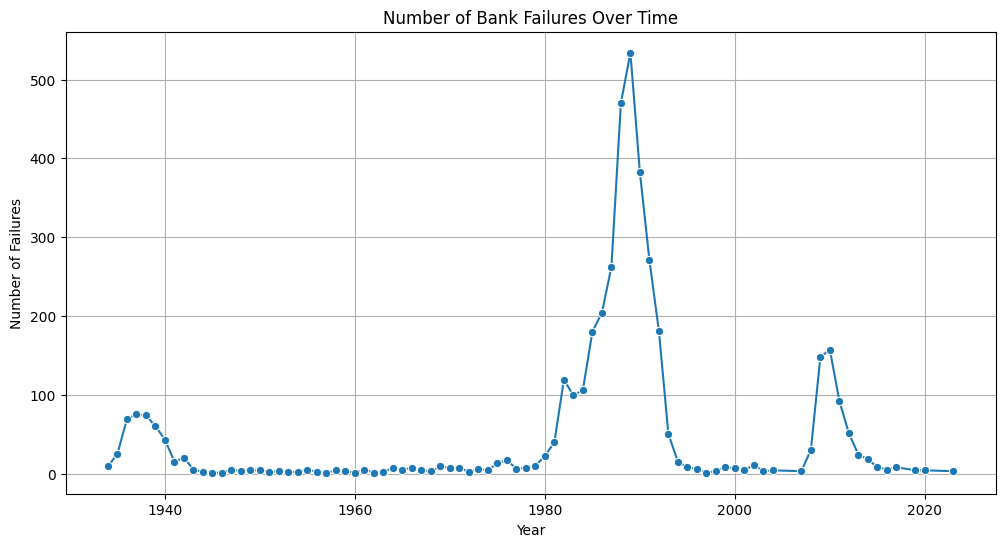

In [21]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to count the number of failures per year
failures_by_year = df.groupby(df['failure_year']).size().reset_index(name='Number of Failures')
failures_by_year.columns = ['Year', 'Number of Failures']

# Plot the Number of Failures Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number of Failures', data=failures_by_year, marker='o')
plt.title('Number of Bank Failures Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Failures')
plt.grid(True)
plt.show()

#### Number of failures by Quarter

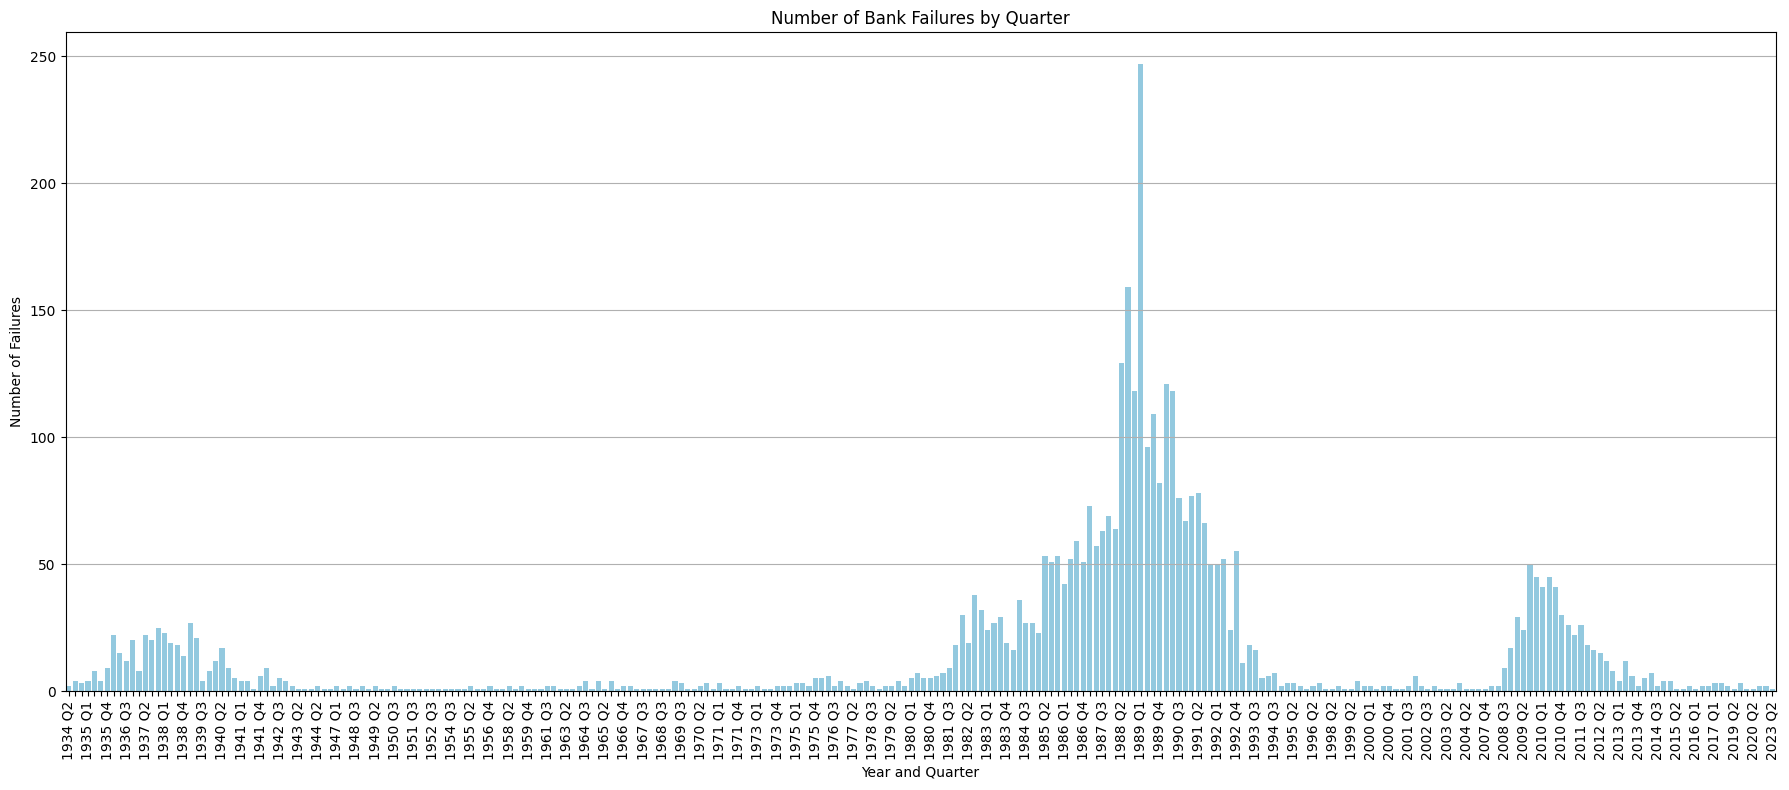

In [22]:
# Create a DataFrame to count the number of failures per year and quarter
failures_by_quarter = df.groupby([df['failure_date'].dt.year, 'failure_quarter']).size().reset_index(name='Number of Failures')
failures_by_quarter.columns = ['Year', 'Quarter', 'Number of Failures']

# Create a new column to combine Year and Quarter for better visualization
failures_by_quarter['Year_Quarter'] = failures_by_quarter['Year'].astype(str) + ' Q' + failures_by_quarter['Quarter'].astype(str)

# Adjust the plot to selectively show labels for every nth quarter to declutter the x-axis
n = 3  # Show every 4th label on the x-axis

plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Year_Quarter', y='Number of Failures', data=failures_by_quarter, color='skyblue')

# Hide x-axis labels and then selectively show every nth label to avoid clutter
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % n == 0:  # show every nth label
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.title('Number of Bank Failures by Quarter')
plt.xlabel('Year and Quarter')
plt.ylabel('Number of Failures')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

#### Bank Failures by State and Year Heatmap

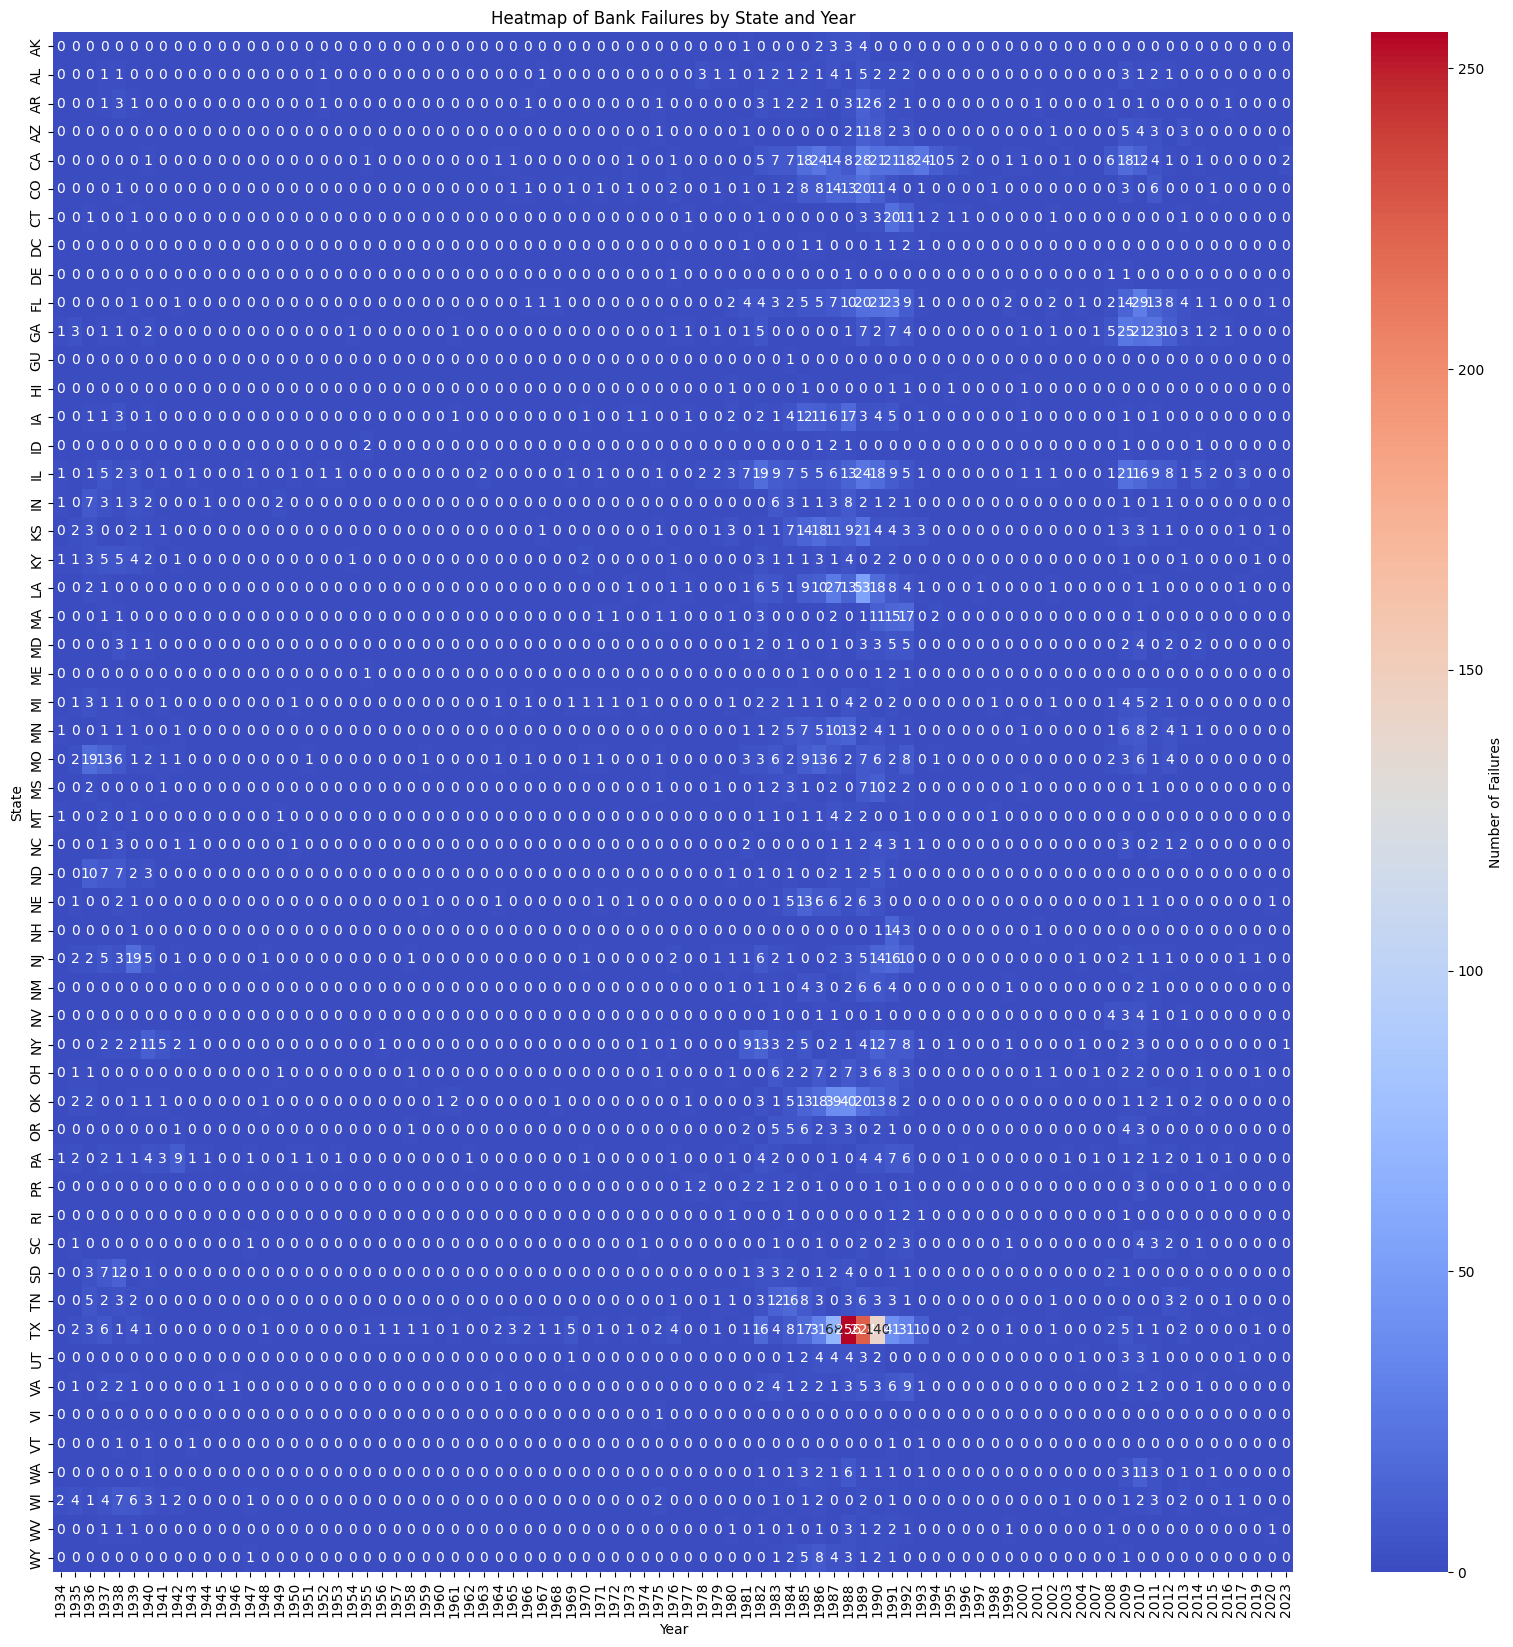

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to count the number of failures per year and state
failures_by_year_state = df.groupby([df['failure_date'].dt.year, 'state']).size().reset_index(name='Number of Failures')
failures_by_year_state.columns = ['failure_year', 'state', 'Number of Failures']

# Pivot the DataFrame to create a format suitable for a heat map
heatmap_data = failures_by_year_state.pivot(index="state", columns="failure_year", values="Number of Failures").fillna(0)

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'Number of Failures'})
plt.title('Heatmap of Bank Failures by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

#### Bank Failures by State and Year Lineplot

In [24]:
# Filter out the relevant columns
failure_by_state = df[['state', 'failure_year']].copy()
failure_by_state.isnull().sum()

state           0
failure_year    0
dtype: int64

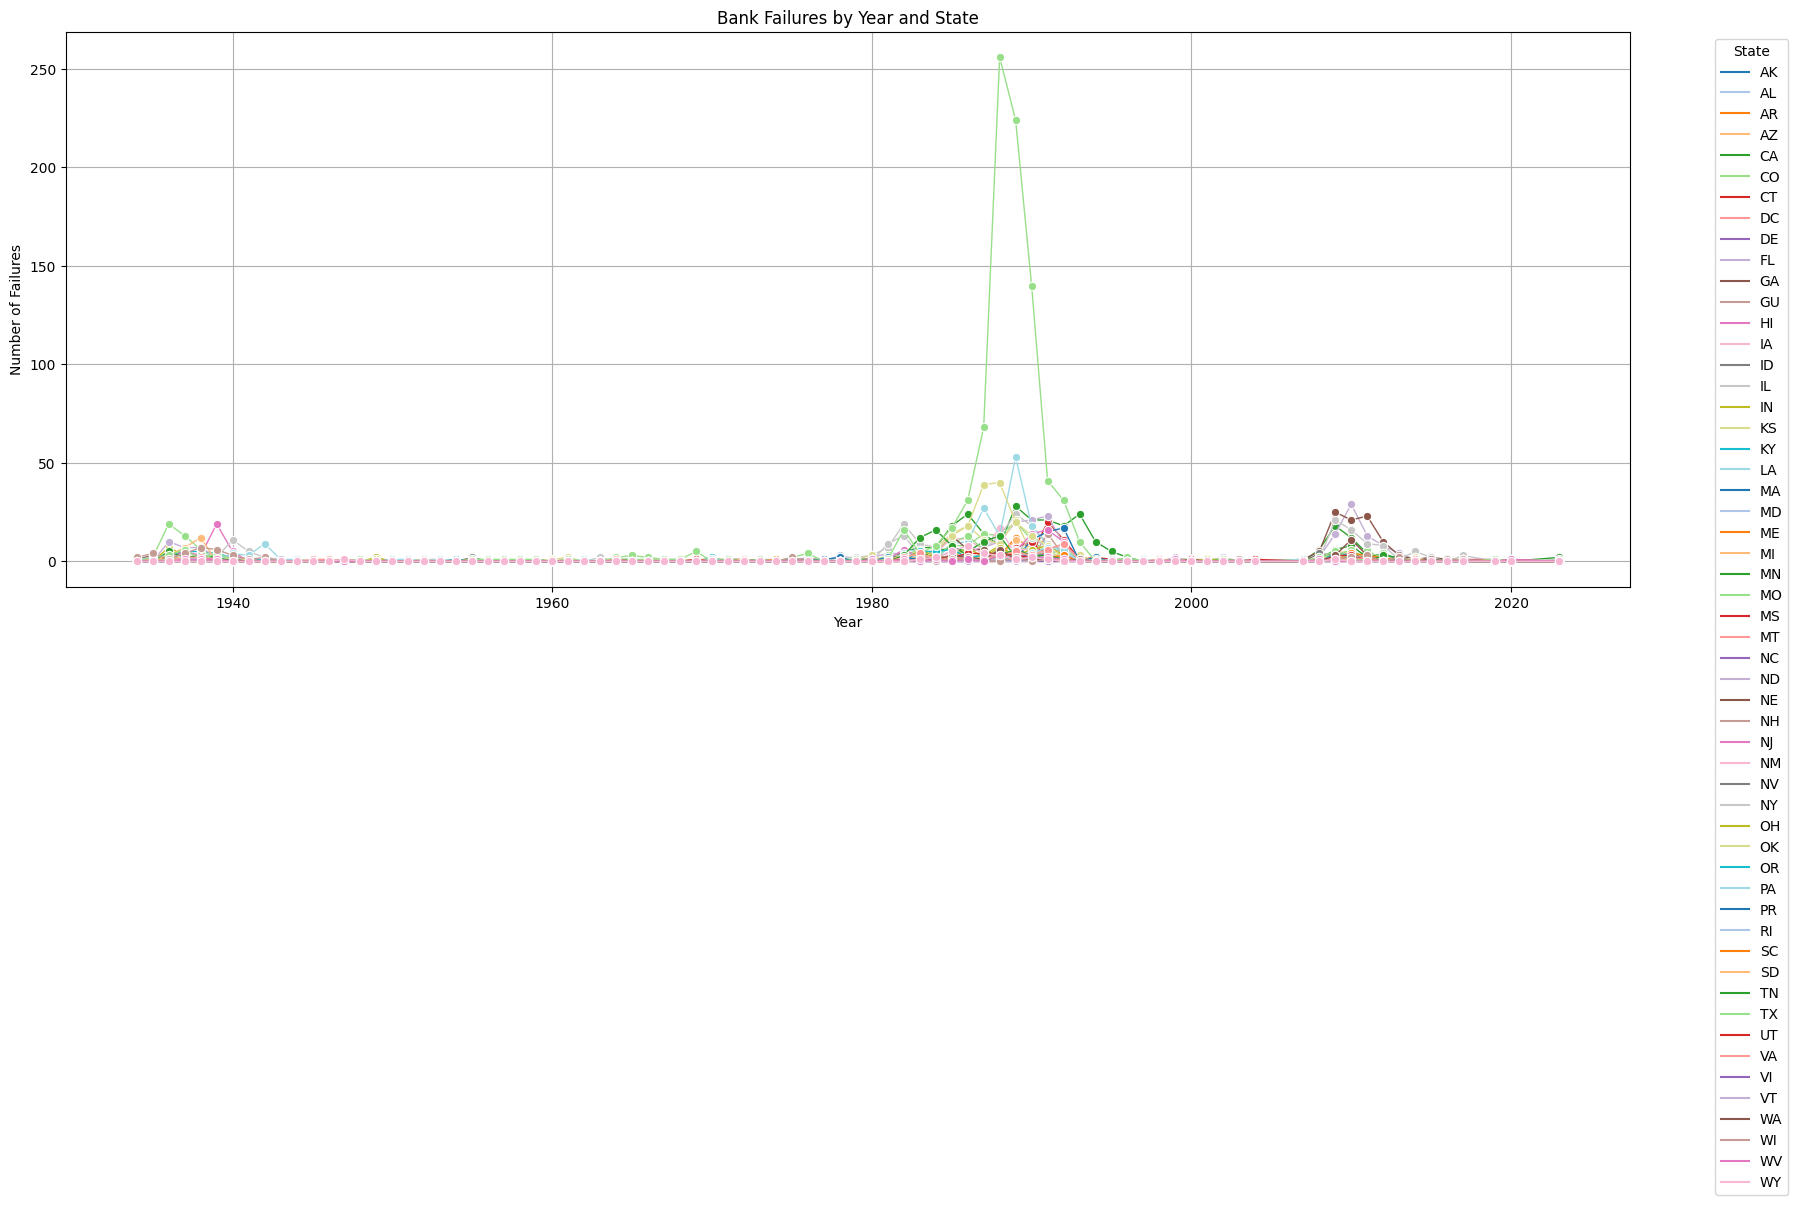

In [25]:
# Create the Line Plot for Failures by Year and State
plt.figure(figsize=(18, 10))
sns.lineplot(x='failure_year', y='Number of Failures', hue='state', data=failures_by_year_state, marker='o', linewidth=1, palette="tab20", hue_order=failures_by_year_state['state'].unique())
plt.title('Bank Failures by Year and State')
plt.xlabel('Year')
plt.ylabel('Number of Failures')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Financial Visualizations

#### Total Deposits vs Total Assets

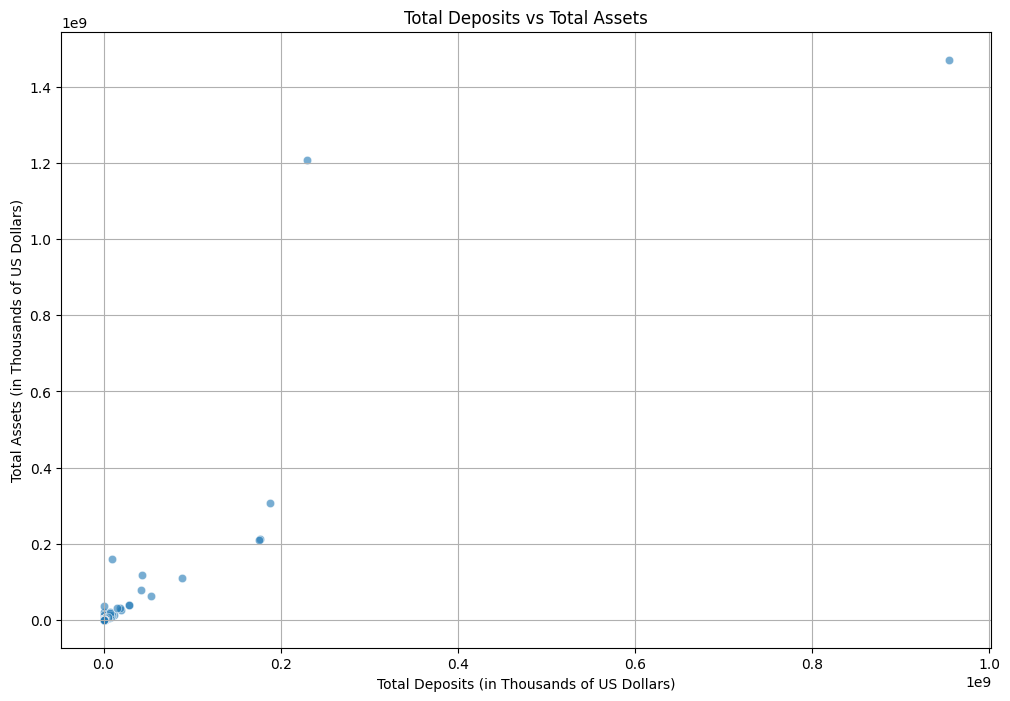

In [26]:
# Create the Scatter Plot for Total Deposits vs Total Assets
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_deposits', y='total_assets', data=df, alpha=0.6)
plt.title('Total Deposits vs Total Assets')
plt.xlabel('Total Deposits (in Thousands of US Dollars)')
plt.ylabel('Total Assets (in Thousands of US Dollars)')
plt.grid(True)
plt.show()

#### Estimated Loss over Time

**NOTE:** We are only looking at data that has values for estimated loss.  This starts ~1980.

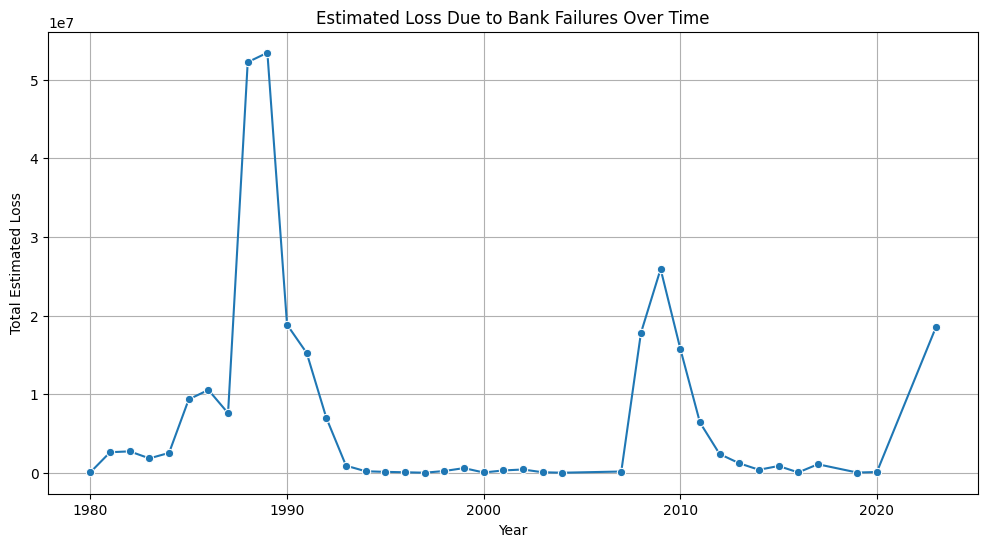

In [27]:
# Filter out records with estimated losses of -1
filtered_df = df[df['estimated_loss'] != -1]

# Create a DataFrame to capture the trend of estimated losses over time
loss_over_time = filtered_df.groupby(df['failure_date'].dt.year)['estimated_loss'].sum().reset_index()
loss_over_time.columns = ['Year', 'Total Estimated Loss']

# Create the Line Chart for Estimated Loss Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total Estimated Loss', data=loss_over_time, marker='o')
plt.title('Estimated Loss Due to Bank Failures Over Time')
plt.xlabel('Year')
plt.ylabel('Total Estimated Loss')
plt.grid(True)
plt.show()

### Categorical Visualizations

#### Failures by charter PieChart

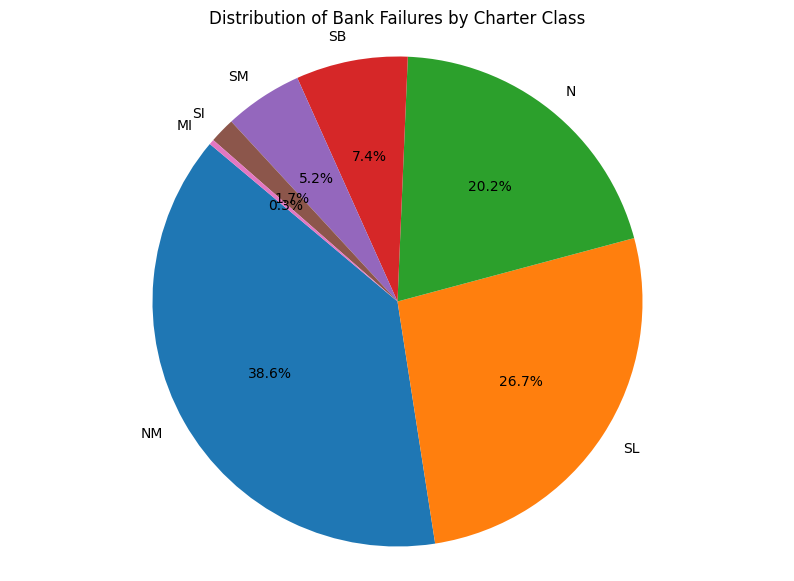

In [28]:
# Create a DataFrame to count the number of failures by charter class
failures_by_charter = df['charter_class'].value_counts().reset_index()
failures_by_charter.columns = ['Charter Class', 'Number of Failures']

# Create the Pie Chart for Failures by Charter Class
plt.figure(figsize=(10, 7))
plt.pie(failures_by_charter['Number of Failures'], labels=failures_by_charter['Charter Class'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Bank Failures by Charter Class')
plt.show()

#### Failures by Insurance Fund Bar Chart

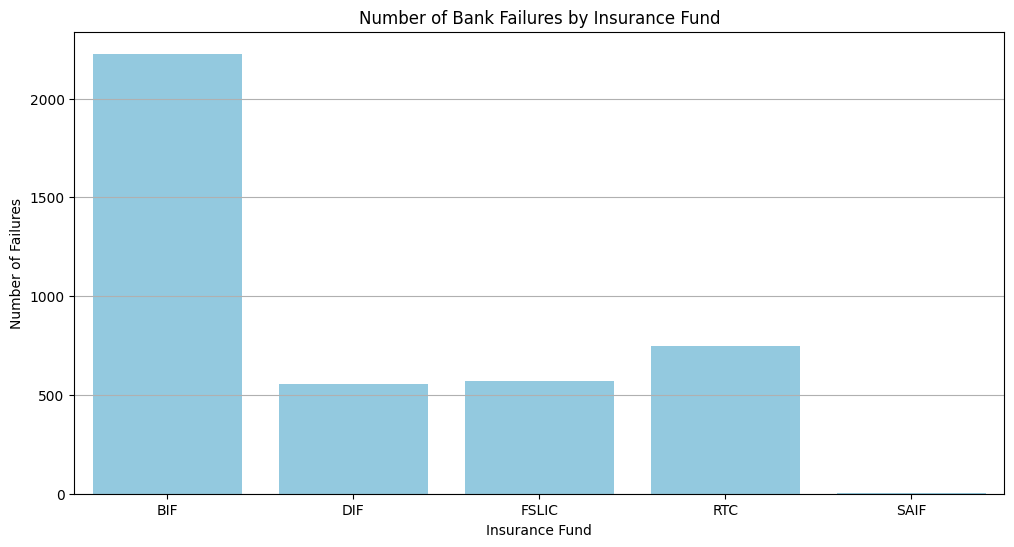

In [29]:

# Create a DataFrame to count the number of failures by insurance fund
failures_by_fund = df['insurance_fund'].value_counts().reset_index()
failures_by_fund.columns = ['Insurance Fund', 'Number of Failures']

# Create the Bar Chart for Failures by Insurance Fund
plt.figure(figsize=(12, 6))
sns.barplot(x='Insurance Fund', y='Number of Failures', data=failures_by_fund, color='skyblue')
plt.title('Number of Bank Failures by Insurance Fund')
plt.xlabel('Insurance Fund')
plt.ylabel('Number of Failures')
plt.grid(True, axis='y')
plt.show()